In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
school_demo_df = pd.read_csv("Resources/cleanschooldemographics2015_revised.csv", na_values=['***'])
school_demo_df.head()

,Corp ID,Corporation Name,Native American Cohort Count,Native American Graduates,Native American Grad Rate,Asian Cohort Count,Asian Graduates,Asian Grad Rate,Black Cohort Count,Black Graduates,...,English Language Learner Grad Rate,Female Cohort Count,Female Graduates,Female Grad Rate,Male Cohort Count,Male Graduates,Male Grad Rate,Total Cohort Count,Total Graduates,Total Grad Rate
0,15,Adams Central Community Schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.0,47.0,95.90%,46.0,43.0,93.50%,95,90,94.70%
1,5265,Alexandria Community School Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58.0,52.0,89.70%,54.0,46.0,85.20%,112,98,87.50%
2,5275,Anderson Community School Corporation,NaN,NaN,NaN,NaN,NaN,NaN,104.0,93.0,...,NaN,204.0,189.0,92.60%,190.0,164.0,86.30%,394,353,89.60%
3,5470,Argos Community Schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.0,15.0,71.40%,25.0,19.0,76.00%,46,34,73.90%
4,2435,Attica Consolidated School Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.0,34.0,100.00%,34.0,33.0,97.10%,68,67,98.50%


In [10]:
corp_name = school_demo_df['Corporation Name']
num_white = school_demo_df['White Cohort Count'].dropna()
cohort_total = school_demo_df['Total Cohort Count']
num_non_white = cohort_total - num_white
percent_white = num_white / cohort_total * 100
percent_non_white = num_non_white / cohort_total * 100
grad_rate = school_demo_df['Total Grad Rate'].str.replace('%','').astype(np.float64)

condensed_demo = pd.DataFrame({
    'Corporation Name': corp_name,
    'White Students' : num_white,
    'Total Cohort': cohort_total,
    'Percent White': percent_white,
    'Percent Non-White': percent_non_white,
    'Grad Rate': grad_rate
})
condensed_demo = condensed_demo.dropna()


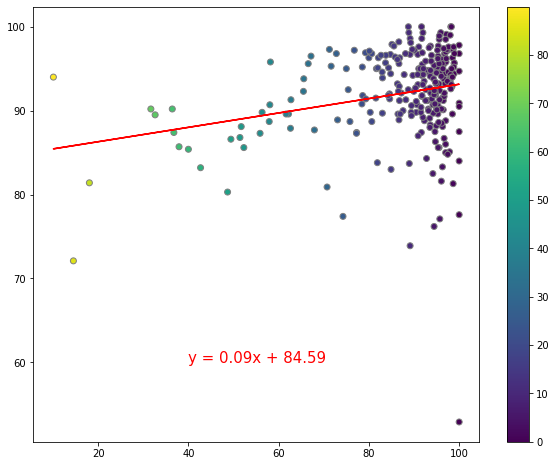

The correlation coefficient between non-waiver graduation rate and cohort size is 0.25


In [14]:
percent_white = condensed_demo['Percent White']
grad_rate = condensed_demo['Grad Rate']
percent_non_white = condensed_demo['Percent Non-White']

(slope, intercept, rvalue, pvalue, stderr) = linregress(percent_white,grad_rate)
regress_values = percent_white * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
plt.scatter(percent_white,grad_rate, c=percent_non_white, edgecolors="grey")
plt.plot(percent_white,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=15,color="red")
plt.colorbar()
plt.show()

cc_demo_2015 = round(st.pearsonr(percent_white,grad_rate)[0],2)
print(f"The correlation coefficient between non-waiver graduation rate and cohort size is {cc_demo_2015}")
